# Statistical Models - David A. Freedman

*Book Table of Contents:*

1. Observational Studies and Experiments
2. The Regression Line
3. Matrix Algebra
4. Multiple Regression
5. Multiple Regression: Special Topics
6. Path Models
7. Maximum Likelihood
8. The Bootstrap
9. Simultaneous Equations
10. Issues in Statistical Modeling

*Overarching Thoughts:*

Chapter 10 on assumption checking and what is wrong with some topics in statistics is my favorite. The reality is that these topics are useful when assumptions are met and proper experiments and data gathering are done. The book is both concise and correct which is an anomoly in the realm of statistics cough Peng, Aditya, Haiyan, Bin, etc. cough. 

# Quick Summary

**Notation**: Unless specified otherwise, 

- $x_i\in\mathbb{R}^n$, 
- $y_i\in\mathbb{R}$, 
- $Y\in\mathbb{R}^n$, 
- $X\in\mathbb{n\times p}$, 
- $m\in\mathbb{R}^{p}$, 
- $b\in\mathbb{R}^n$, 
- $1_n = \langle \underbrace{1, \dots, 1}_{n \text{ elements}}\rangle$
- $\bar{x}=\sum_i x_i=\frac{1}{n}1_n\cdot \langle x_1,\dots,x_n\rangle$, 
- $\mathbb{V}(x)=\frac{1}{n}\sum_i (x_i-\bar{x})^2$
- $s_x=\sqrt{\mathbb{V}(x)}$
- $\mathrm{Cov}(x,y)=\frac{1}{n}\sum_i (x_i-\bar{x})(y_i-\bar{y})$
- $\mathrm{Corr}(x,y)=\frac{\mathrm{Cov}(x,y)}{s_xs_y}$
- Regression line is specified by $y-\bar{y}=m(x-\bar{x})$ or $y=mx+b$
where $b=\bar{y}-m\bar{x}$
- Mean square error is given by $\frac{1}{n}\sum_i (y_i-y(x_i))^2$

## 1

- **Observational studies**: Participants assign themselves to the control or treatment group 
  - Examples: smoking, cancer, disease studies (can't give participants these without raising ethical eyebrows)
  - Here, causal inference is largely infeasible - many possible confounding variables. Partitioning data by more groups to control for confounding leads down a rabbit hole.
- **Randomized controlled experiments**: Participants are assigned to the control or treatment group at random (i.e a coin flip). 
  - The gold standard for proving causal relations exist as confounding variables are heterogenously mixed as we randomize group assignment.


## 2

- The regression line is computed from five, related summary statistics: $\bar{x}, \bar{y}, \mathbb{V}(x), \mathbb{V}(y), \text{and } \mathrm{Cov}(x, y)$ where the slope $m$ is given by

$$m=\mathrm{Corr}(x, y)\frac{\sqrt{\mathbb{V}(y)}}{\sqrt{\mathbb{V}(x)}}=\frac{\mathrm{Cov}(x, y)\sqrt{\mathbb{V}(y)}}{\sqrt{\mathbb{V}(x)}\sqrt{\mathbb{V}(x)}\sqrt{\mathbb{V}(y)}}=\frac{\mathrm{Cov}(x, y)}{\mathbb{V}(x)}$$
- Even if either variance is zero, the line still make sense. Increasing the covariance increases the steepness while increasing the variance of $x$ decreases the slope (i.e data is more spread out along x-axis).
- The line of standard deviation is equivalent to the above except we assume the correlation is always $\pm 1$. There's a graphic below exercises showing the difference visually:

$$m=\text{sign}\left(\mathrm{Corr}(x, y)\right)\frac{\sqrt{\mathbb{V}(y)}}{\sqrt{\mathbb{V}(x)}}.$$

- For the regression line, the mean square error (MSE), sum of squared residuals, is directly related to the covariance of $x$ and $y$. To see, assume $x$ and $y$ are centered, then

$$\text{MSE}=\frac{1}{n}\sum_i \left(y_i-mx_i\right)^2=\frac{1}{n}\sum_i y_i^2 - \frac{2m}{n}\sum_i x_iy_i+\frac{m^2}{2}\sum_i x_i^2$$

$$=\frac{1}{n}\sum_i y_i^2 - \frac{\left(\sum_i x_iy_i\right)^2}{\sum_i x_i^2}=\mathbb{V}(y)\left[1-\mathrm{Corr}(x,y)^2\right].$$

- $Y=a+bX + \epsilon$ is a **regression model** as $a,b$ are unknown parameters and $\epsilon$ is a random error
- After applying least squares, we obtain $\hat{a}$, $\hat{b}$, and $e=y-\hat{y}=y-\hat{a}-\hat{b}x$. Here, $\hat{a},\hat{b}\neq a,b$ - they are simply estimates that converge towards $a,b$ in a sufficiently large sample. Additionally, $e$ is no longer random - it is simply a residual. 
- If $Y=a+bX$ and $x_1,\dots,x_n,y_1,\dots,y_n$ are observed values of the random variables, then $\hat{a},\hat{b},$ and $e$ are observed values of random variables like how tosses $\{H, H, T, T, T\}$ represent observed values from tossing 5 fair coins.
- Variance should not be used to measure spread - it's usually the wrong units. If we are measuring weight of men, data is presented in pounds (lbs), but variance is squared pounds and so we instead look at the standard deviation (the square root of variance). Another technical nuance: standard deviation applies to observed data while standard error applies to the random variables. 


## 3

- A review of matrices. I will save most discussion on matrices and linear algebra for a separate notebook once I revisit my linear algebra books.
- Generally, matrices represent linear transformations and matrix multiplication represents the composition of linear transformations $f\circ g (x) = ABx$ if $f(x)=Ax$ and $g(x)=Bx$.
- The determinant of an $N$-dimensional square matrix $A$ represents the signed volume when applying $A$ to a $N$-dimensional unit cube
- The transpose of an $m\times n$ matrix $A$ is a $n\times m$ matrix $A^\intercal$ that represents the linear transformation $A_{ij}\mapsto (A^\intercal)_{ji}$.
- The dot product of two vectors $u,v\in\mathbb{R}^n$ is defined as the product of their lengths times the cosine angle, $\theta$, between them: $$u\cdot v=\lVert u\rVert\lVert v\rVert\cos (\theta).$$ 
A more intuitive interpretation is capture below: the dot product is the product of the length of the "shadow" of $u$ on $v$ times the length of $v$: ![dot-product](figs/dotProduct.png)
- The sample mean is $1/n\langle x, 1_n\rangle$
- The (sample) covariance between two random variables is measured by the dot product of deviations from their respective means: 
$$\mathrm{Cov}(x,y)=\frac{1}{n}(\langle x_1,\dots,x_n\rangle-\bar{x} 1_n)\cdot (\langle y_1,\dots,y_n\rangle-\bar{y} 1_n).$$
- The (sample) covariance matrix between $k$ random variables $x^1,\dots,x^k$ is a $k\times k$ matrix where the $ij$ th entry is given by 
$$\mathrm{Cov}(x^i,x^j)=\frac{1}{n}(\langle x^i_1,\dots,x^i_n\rangle-\bar{x}^i 1_n)\cdot (\langle x^j_1,\dots,x^j_n\rangle-\bar{x}^j 1_n).$$
- The inverse of a matrix $A$, $A^{-1}$ (if it exists), tells us the mapping needed to send a vector back to its starting point:
$$x\rightarrow Ax\rightarrow A^{-1}Ax=x.$$ 
- $A^{-1}$ can be computed as follows: $A^{-1}=\mathrm{adj}(A)/\mathrm{det}(A)$ where the adjoint is the transpose of the matrix of cofactors (i.e. entry $ij$ is given by crossing out row $i$ and column $j$ and computing the determinant).
- 


## 4

asdf

## 5

asdf 

## 6

asdf

## 7

asdf 

## 8

asdf 

## 9

asdf

## 10

- IID data can be replaced by DDD (dependent and differently distributed), but is this really better??
- Data are linear with constant coefficients (LCC) or linear with non-constant coefficients (LNC) or non-linear with constant coefficients (NLCC) or or non-linear with non-constant coefficients (NLNC). Random coefficents - why would they be different? 
- Regression involves narrowing the functional class to a suitable subspace (linear, log-linear, etc.) - inferring the right model from the data is generally impossible unless **strong prior theory** limits this space
- Bayesian approach to model selection is bs - priors that have infinite mass or depend on data add on a layer of mess to the problem
- The bootstrap is useful in creating standard errors given a model. But it does not answer questions about the validity of models
- Statisticians defend models on the basis of asymptotics - the way they behave when the sample size is large. A few issues here: 1) stationarity of data is implicit (but not often met), 2) what happens to a subset of 100 samples from 100,000 is not strong enough
- Causality is astrology: many models may explain the same data and assumptions must be made to identify causal models. Moreover, causes may be interrelated - empirical approaches to causal questions are impossible.
- "it is difficult to make causal inferences from observational data, especially when research focuses on complex political processes. Behind the apparent precision of quantitative findings lie many potential problems concerning equivalence of cases, conceptualization and measurement, assumptions about the data, and choices about model specification..." (Brady, Collier, and Seawright, 2004)
- One of the difficulties with regression models is accounting for the $\epsilon$'s. Where do they come from, what do they mean, and why do they have the required statistical properties?
- Generally model selection is decided for a model's strengths not weakenesses?


# Problems 

The problems not given in the back of the book.

## 2

**2.15**: Note that 

$$\overline{x^*}=\frac{1}{n}\sum_i \frac{x_i-\bar{x}}{s_x}=\frac{1}{ns_x}(n\bar{x}-n\bar{x})=0$$

and 

$$s_{x^*}=\sqrt{\frac{1}{n}\sum_i \left((\frac{x_i-\bar{x}}{s_x}-0\right)^2}=\sqrt{\frac{1}{s_x^2}s_x^2}=1.$$

Thus,

$$r(x^*,y^*)=\frac{1}{n}\sum_i \left(\frac{x_i-\bar{x}}{s_x}\right)\cdot\left(\frac{y_i-\bar{y}}{s_y}\right)=r(x,y).$$

**2B.16**: Following our nose,

$$\frac{1}{n}\sum_i (x_i+y_i)^2=\frac{1}{n}\left[\sum_i x_i^2 + 2\sum_i x_iy_i + \sum y_i^2\right]=2(1+r),$$

and similarly,

$$\frac{1}{n}\sum_i (x_i-y_i)^2=\frac{1}{n}\left[\sum_i x_i^2 - 2\sum_i x_iy_i + \sum y_i^2\right]=2(1-r).$$

For the last question, we use Cauchy-Schwarz

$$|r(x^*,y^*)|=\left|\frac{1}{n}\sum_i x^*_iy^*_i\right|\leq \sqrt{\frac{1}{n}\sum (x^*_i)^2\cdot \frac{1}{n}\sum (y^*_i)^2}=1.$$

## 3

**3A.2**: $Au=\begin{bmatrix} A_1 & \cdots & A_n\end{bmatrix}u=A_1u_1+\cdots + A_nu_n$ where $u_i\in\mathbb{R}$ and $A_i$ represents the column vectors in $\mathbb{R}^m$ that make up $A$. $\mathbb{R}^m$ is a vector space and so of course, any weighted linear combination of vectors in $\mathbb{R}^m$ is still contained in $\mathbb{R}^m$. For the second part,

$$A\alpha u=\begin{bmatrix} A_1 & \cdots & A_n\end{bmatrix}\alpha u=\alpha A_1 u_1+\cdots + \alpha A_nu_n=\alpha \begin{bmatrix} A_1 & \cdots & A_n\end{bmatrix} u=\alpha Au.$$

Then for the final question, 

$$A(u+v)= A_1 u_1+\cdots +  A_n u_n + A_1 v_1 + \cdots +  A_n v_n=Au+Av.$$

**3A.3**: $(A+O)_{ij}=A_{ij}+0_{ij}=0_{ij}+A_{ij}=(0+A)_{ij}$ (as dumb as this exercise may sound).

**3A.4**: By definition - don't feel like LaTeXing another commutative property problem.

**3B.2**: If we multiply the inverse formula by $A$ and both sides by $\det A$, we get the result. 

**3B.3**: $A$ has rank $2$ and trace $4$. $B$ has rank 3 and trace $5$.

**3B.4**: $C$ has rank 2.

**3B.5**: $C$ has rank 2.

**3B.6**: $C$ has rank 2.

**3B.7**: $C$ has rank 2.

**3B.8**: $C$ has rank 2.

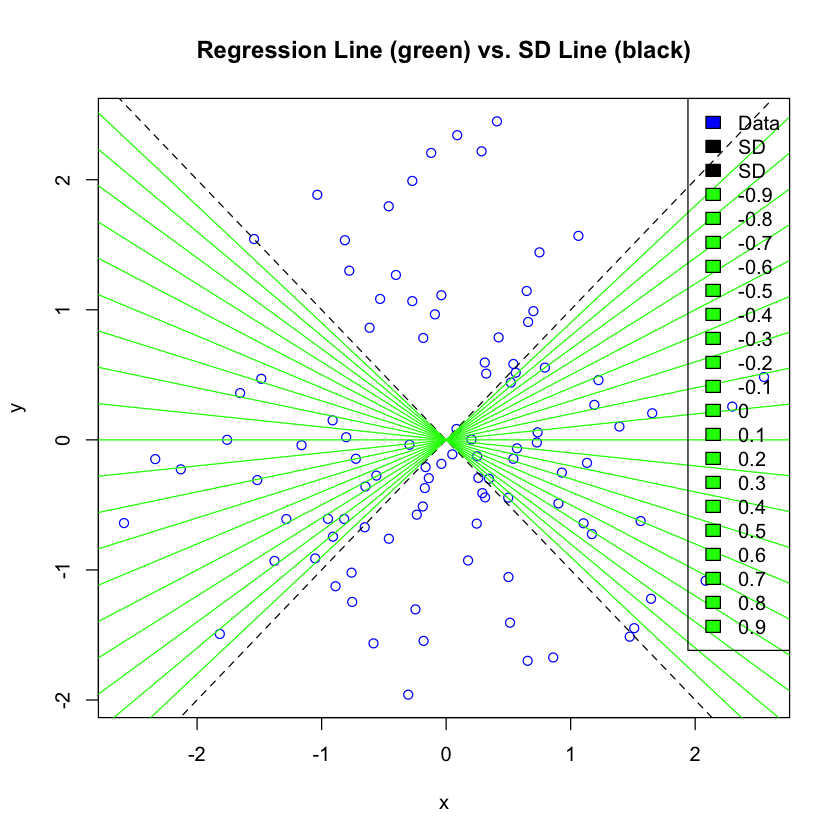

In [20]:
# Chapter 2 code

# regression line vs standard deviation line
set.seed(1)
x <- rnorm(100, 0, 1)
y <- rnorm(100, 0, 1)
x <- (x - mean(x)) / sd(x)
y <- (y - mean(y)) / sd(y)
rhos = seq(-0.9, 0.9, 0.1)
plot(x, y, col = "blue")
lines(
    c(-5, 5), 
    c(-5, 5), 
    lty=2, 
    col = "black"
)
lines(
    c(-5, 5), 
    -c(-5, 5), 
    lty=2, 
    col = "black"
)
for (rho in rhos) {
    lines(
        c(-5, 5), 
        c(-5, 5)*rho, 
        col = "green"
    )
}
legend(
    "topright", 
    c("Data", "SD", "SD", rhos), 
    fill=c(
        "blue", 
        "black", 
        "black", 
        rep("green", 19)
    )
)
title("Regression Line (green) vs. SD Line (black)")

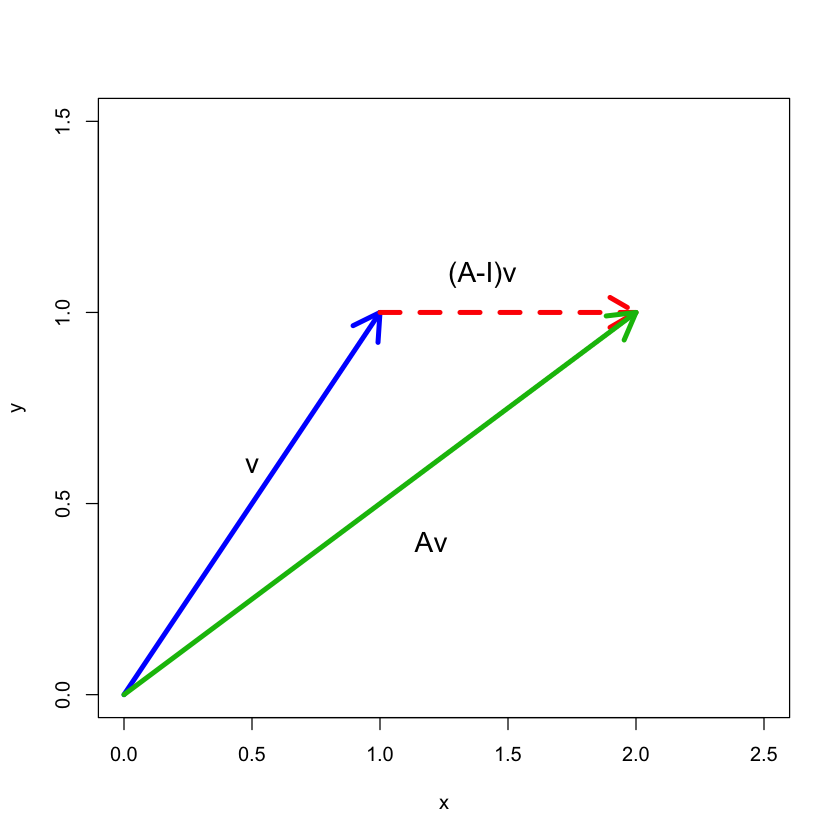

In [48]:
# Chapter 3 code

# Consider a matrix A=[[1, 1], [0, 1]] and a vector v=[1, 1]. Hitting the vector by the matrix yields
# a new vector in the same space: Av=[2, 1]. Red represents the linear transformation from v (blue) to Av (green).
# The transformation stretches the vector out horizontally.
plot(NULL, xlim=c(0,2.5), ylim=c(0,1.5), xlab="x", ylab="y")
arrows(c(0, 1, 0), c(0, 1, 0), c(1, 2, 2), c(1, 1, 1), col=c("blue", "red", "#08bd08"), lwd=4, lty=c(1, 2, 1))
text(0.5, 0.6, "v", cex = 1.4)
text(1.2, 0.4, "Av", cex = 1.4)
text(1.4, 1.1, "(A-I)v", cex = 1.4)